In [68]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install statsmodels
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from numpy import set_printoptions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
#original (have to downgrade sklearns package to use): from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
#import pydotplus
from sklearn import tree
#import graphviz

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier

import warnings

from sklearn.kernel_ridge import KernelRidge

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:

foldername = '/dbstremor/'
filename = 'background.csv'
data = read_csv(foldername+filename)
df = pd.DataFrame(data)
dataFrame = pd.DataFrame(data)


In [71]:
def load_dataset(file_name):
    return pd.read_csv(file_name)

def find_text_columns(df):
    text_columns = [col for col in df.columns if df[col].dtype == object]
    return text_columns

def convert_categorical_to_numeric(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

columns_to_convert = ['GENDER', 'STIM TARGET', 'BI/UNI-LATERAL', 'EFF FREQ (Hz)', 'MODE (CONT/CYCL)', 'LOW VS HIGH AMPLITUDE TREMOR']

df_numerical = convert_categorical_to_numeric(df, columns_to_convert)

print(df_numerical.head())

df_numerical

  SUBJECT  AGE (YRS)  GENDER  STIM TARGET  BI/UNI-LATERAL  EFF FREQ (Hz)  \
0      g1         54       1            0               0              3   
1      g2         52       1            0               1              2   
2      v3         71       0            2               1              0   
3      v4         67       1            2               1              3   
4      v5         40       1            2               1              1   

   INEFF FREQ (Hz)  INTENSITY (V)  PULSE WIDTH (mu sec)  MODE (CONT/CYCL)  \
0               90            2.4                    90                 0   
1               60            3.7                   120                 1   
2               65            3.3                    60                 0   
3               60            5.3                    90                 0   
4               60            1.3                    90                 0   

   YEAR DIAGNOSED  TOT DAILY MED (mg)  150% SINGLE DOSE (mg)  \
0            198

,SUBJECT,AGE (YRS),GENDER,STIM TARGET,BI/UNI-LATERAL,EFF FREQ (Hz),INEFF FREQ (Hz),INTENSITY (V),PULSE WIDTH (mu sec),MODE (CONT/CYCL),YEAR DIAGNOSED,TOT DAILY MED (mg),150% SINGLE DOSE (mg),LOW VS HIGH AMPLITUDE TREMOR,ROF VELOCITY AMPLITUDE (mm/s),ROF VELOCITY FREQUENCY (Hz),RON VELOCITY AMPLITUDE (mm/s),RON VELOCITY FREQUENCY (Hz)
0,g1,54,1,0,0,3,90,2.4,90,0,1985,300,150,0,NaN,NaN,NaN,NaN
1,g2,52,1,0,1,2,60,3.7,120,1,1985,1100,300,0,1.643923,24.993032,0.119364,24.992991
2,v3,71,0,2,1,0,65,3.3,60,0,1989,500,150,0,NaN,NaN,NaN,NaN
3,v4,67,1,2,1,3,60,5.3,90,0,1990,600,300,0,1.233243,24.992041,1.911340,24.992226
4,v5,40,1,2,1,1,60,1.3,90,0,1999,1000,300,0,0.652377,24.985294,0.505234,24.993192
5,s6,61,0,1,0,3,60,2.0,90,1,1990,300,200,0,1.756531,24.994514,0.141955,24.993203
6,s7,59,0,1,0,3,90,2.4,90,1,1984,1000,375,0,0.441698,24.992018,0.068597,24.991979
7,s8,64,1,1,0,1,65,2.8,90,0,1990,1000,300,0,1.398368,24.991956,0.051508,24.992560
8,g9,68,1,0,0,3,90,3.7,90,0,1981,1200,300,1,0.085892,24.992131,0.068282,24.994539
9,g10,59,1,0,0,3,60,3.7,70,0,1975,900,375,1,0.089027,24.991909,0.207662,24.995870


In [72]:
df = df_numerical
df

,SUBJECT,AGE (YRS),GENDER,STIM TARGET,BI/UNI-LATERAL,EFF FREQ (Hz),INEFF FREQ (Hz),INTENSITY (V),PULSE WIDTH (mu sec),MODE (CONT/CYCL),YEAR DIAGNOSED,TOT DAILY MED (mg),150% SINGLE DOSE (mg),LOW VS HIGH AMPLITUDE TREMOR,ROF VELOCITY AMPLITUDE (mm/s),ROF VELOCITY FREQUENCY (Hz),RON VELOCITY AMPLITUDE (mm/s),RON VELOCITY FREQUENCY (Hz)
0,g1,54,1,0,0,3,90,2.4,90,0,1985,300,150,0,NaN,NaN,NaN,NaN
1,g2,52,1,0,1,2,60,3.7,120,1,1985,1100,300,0,1.643923,24.993032,0.119364,24.992991
2,v3,71,0,2,1,0,65,3.3,60,0,1989,500,150,0,NaN,NaN,NaN,NaN
3,v4,67,1,2,1,3,60,5.3,90,0,1990,600,300,0,1.233243,24.992041,1.911340,24.992226
4,v5,40,1,2,1,1,60,1.3,90,0,1999,1000,300,0,0.652377,24.985294,0.505234,24.993192
5,s6,61,0,1,0,3,60,2.0,90,1,1990,300,200,0,1.756531,24.994514,0.141955,24.993203
6,s7,59,0,1,0,3,90,2.4,90,1,1984,1000,375,0,0.441698,24.992018,0.068597,24.991979
7,s8,64,1,1,0,1,65,2.8,90,0,1990,1000,300,0,1.398368,24.991956,0.051508,24.992560
8,g9,68,1,0,0,3,90,3.7,90,0,1981,1200,300,1,0.085892,24.992131,0.068282,24.994539
9,g10,59,1,0,0,3,60,3.7,70,0,1975,900,375,1,0.089027,24.991909,0.207662,24.995870


In [73]:
df.drop("SUBJECT", axis=1, inplace=True)
df.drop("YEAR DIAGNOSED", axis=1, inplace=True)
df = df.dropna()
df

,AGE (YRS),GENDER,STIM TARGET,BI/UNI-LATERAL,EFF FREQ (Hz),INEFF FREQ (Hz),INTENSITY (V),PULSE WIDTH (mu sec),MODE (CONT/CYCL),TOT DAILY MED (mg),150% SINGLE DOSE (mg),LOW VS HIGH AMPLITUDE TREMOR,ROF VELOCITY AMPLITUDE (mm/s),ROF VELOCITY FREQUENCY (Hz),RON VELOCITY AMPLITUDE (mm/s),RON VELOCITY FREQUENCY (Hz)
1,52,1,0,1,2,60,3.7,120,1,1100,300,0,1.643923,24.993032,0.119364,24.992991
3,67,1,2,1,3,60,5.3,90,0,600,300,0,1.233243,24.992041,1.911340,24.992226
4,40,1,2,1,1,60,1.3,90,0,1000,300,0,0.652377,24.985294,0.505234,24.993192
5,61,0,1,0,3,60,2.0,90,1,300,200,0,1.756531,24.994514,0.141955,24.993203
6,59,0,1,0,3,90,2.4,90,1,1000,375,0,0.441698,24.992018,0.068597,24.991979
7,64,1,1,0,1,65,2.8,90,0,1000,300,0,1.398368,24.991956,0.051508,24.992560
8,68,1,0,0,3,90,3.7,90,0,1200,300,1,0.085892,24.992131,0.068282,24.994539
9,59,1,0,0,3,60,3.7,70,0,900,375,1,0.089027,24.991909,0.207662,24.995870
10,57,1,0,0,3,60,4.6,90,0,1200,450,1,0.112453,24.992071,0.078759,24.992146
11,54,1,0,0,3,60,4.0,90,1,1100,450,1,0.066962,24.992138,0.061469,24.993032


In [74]:
X = df.drop(columns=['AGE (YRS)', 'GENDER', 'MODE (CONT/CYCL)', 'TOT DAILY MED (mg)', '150% SINGLE DOSE (mg)', 'LOW VS HIGH AMPLITUDE TREMOR',  'ROF VELOCITY FREQUENCY (Hz)', 'RON VELOCITY FREQUENCY (Hz)'])
Y = df['LOW VS HIGH AMPLITUDE TREMOR']
print(X)

print("\nbreak\n")

print(Y)

    STIM TARGET  BI/UNI-LATERAL  EFF FREQ (Hz)  INEFF FREQ (Hz)  \
1             0               1              2               60   
3             2               1              3               60   
4             2               1              1               60   
5             1               0              3               60   
6             1               0              3               90   
7             1               0              1               65   
8             0               0              3               90   
9             0               0              3               60   
10            0               0              3               60   
11            0               0              3               60   
12            0               0              0               60   
13            1               0              3               60   
14            1               0              1               40   
15            1               0              3               6

In [75]:
dataFrame


,SUBJECT,AGE (YRS),GENDER,STIM TARGET,BI/UNI-LATERAL,EFF FREQ (Hz),INEFF FREQ (Hz),INTENSITY (V),PULSE WIDTH (mu sec),MODE (CONT/CYCL),YEAR DIAGNOSED,TOT DAILY MED (mg),150% SINGLE DOSE (mg),LOW VS HIGH AMPLITUDE TREMOR,ROF VELOCITY AMPLITUDE (mm/s),ROF VELOCITY FREQUENCY (Hz),RON VELOCITY AMPLITUDE (mm/s),RON VELOCITY FREQUENCY (Hz)
0,g1,54,M,GPi,Bi,185,90,2.4,90,Cont,1985,300,150,H,NaN,NaN,NaN,NaN
1,g2,52,M,GPi,Uni,160,60,3.7,120,Cycl,1985,1100,300,H,1.643923,24.993032,0.119364,24.992991
2,v3,71,F,Vim,Uni,130,65,3.3,60,Cont,1989,500,150,H,NaN,NaN,NaN,NaN
3,v4,67,M,Vim,Uni,185,60,5.3,90,Cont,1990,600,300,H,1.233243,24.992041,1.911340,24.992226
4,v5,40,M,Vim,Uni,135,60,1.3,90,Cont,1999,1000,300,H,0.652377,24.985294,0.505234,24.993192
5,s6,61,F,STN,Bi,185,60,2.0,90,Cycl,1990,300,200,H,1.756531,24.994514,0.141955,24.993203
6,s7,59,F,STN,Bi,185,90,2.4,90,Cycl,1984,1000,375,H,0.441698,24.992018,0.068597,24.991979
7,s8,64,M,STN,Bi,135,65,2.8,90,Cont,1990,1000,300,H,1.398368,24.991956,0.051508,24.992560
8,g9,68,M,GPi,Bi,185,90,3.7,90,Cont,1981,1200,300,L,0.085892,24.992131,0.068282,24.994539
9,g10,59,M,GPi,Bi,185,60,3.7,70,Cont,1975,900,375,L,0.089027,24.991909,0.207662,24.995870


In [76]:
dataFrame.describe()

,AGE (YRS),EFF FREQ (Hz),INEFF FREQ (Hz),INTENSITY (V),PULSE WIDTH (mu sec),YEAR DIAGNOSED,TOT DAILY MED (mg),150% SINGLE DOSE (mg),ROF VELOCITY AMPLITUDE (mm/s),ROF VELOCITY FREQUENCY (Hz),RON VELOCITY AMPLITUDE (mm/s),RON VELOCITY FREQUENCY (Hz)
count,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,14.000000,14.000000,14.000000,14.000000
mean,55.62500,167.18750,65.000000,3.168750,88.750000,1986.875000,775.000000,268.750000,0.555215,24.991926,0.248101,24.992859
std,10.09868,24.62849,13.540064,1.049901,12.041595,6.323238,356.837965,107.432149,0.657731,0.002034,0.493288,0.001134
min,37.00000,130.00000,40.000000,1.300000,60.000000,1974.000000,300.000000,150.000000,0.051354,24.985294,0.051508,24.991806
25%,51.50000,135.00000,60.000000,2.400000,90.000000,1984.750000,400.000000,150.000000,0.077773,24.992024,0.065000,24.992021
50%,57.00000,185.00000,60.000000,3.050000,90.000000,1989.000000,950.000000,300.000000,0.103007,24.992101,0.072107,24.992546
75%,61.75000,185.00000,65.000000,3.775000,90.000000,1990.000000,1100.000000,318.750000,1.088026,24.992388,0.136307,24.993152
max,71.00000,185.00000,90.000000,5.300000,120.000000,1999.000000,1200.000000,450.000000,1.756531,24.994514,1.911340,24.995870


<Figure size 3000x2000 with 0 Axes>

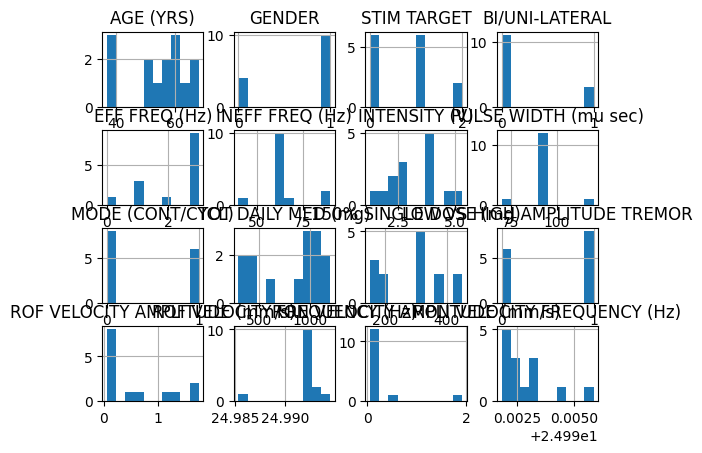

<Figure size 3000x2000 with 0 Axes>

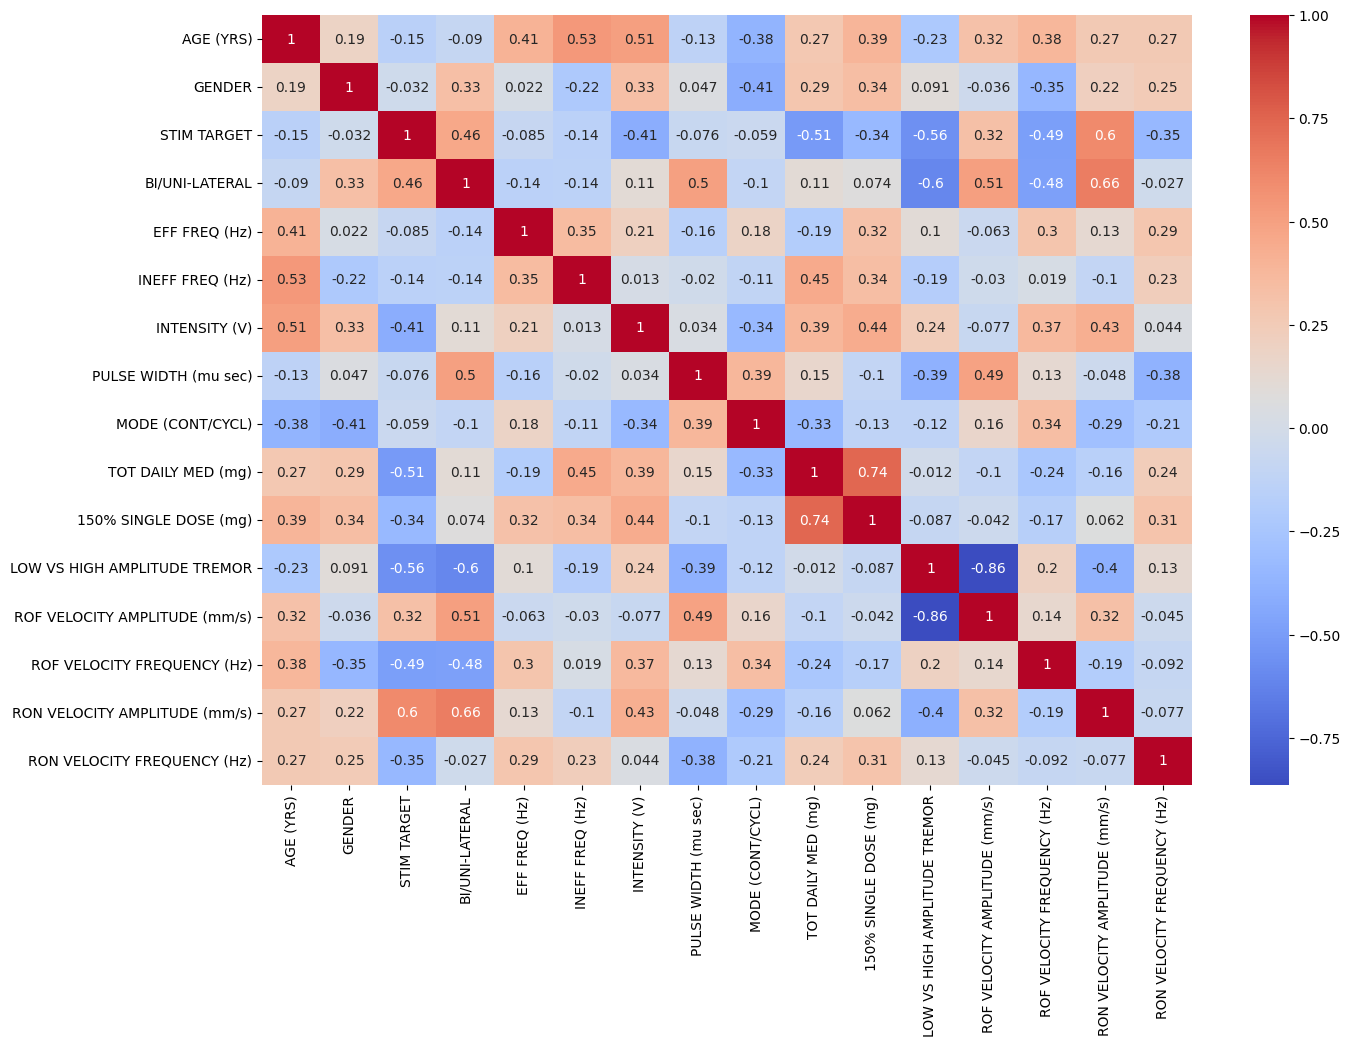

array([[<Axes: xlabel='AGE (YRS)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='GENDER', ylabel='AGE (YRS)'>,
        <Axes: xlabel='STIM TARGET', ylabel='AGE (YRS)'>,
        <Axes: xlabel='BI/UNI-LATERAL', ylabel='AGE (YRS)'>,
        <Axes: xlabel='EFF FREQ (Hz)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='INEFF FREQ (Hz)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='INTENSITY (V)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='PULSE WIDTH (mu sec)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='MODE (CONT/CYCL)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='TOT DAILY MED (mg)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='150% SINGLE DOSE (mg)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='LOW VS HIGH AMPLITUDE TREMOR', ylabel='AGE (YRS)'>,
        <Axes: xlabel='ROF VELOCITY AMPLITUDE (mm/s)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='ROF VELOCITY FREQUENCY (Hz)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='RON VELOCITY AMPLITUDE (mm/s)', ylabel='AGE (YRS)'>,
        <Axes: xlabel='RON

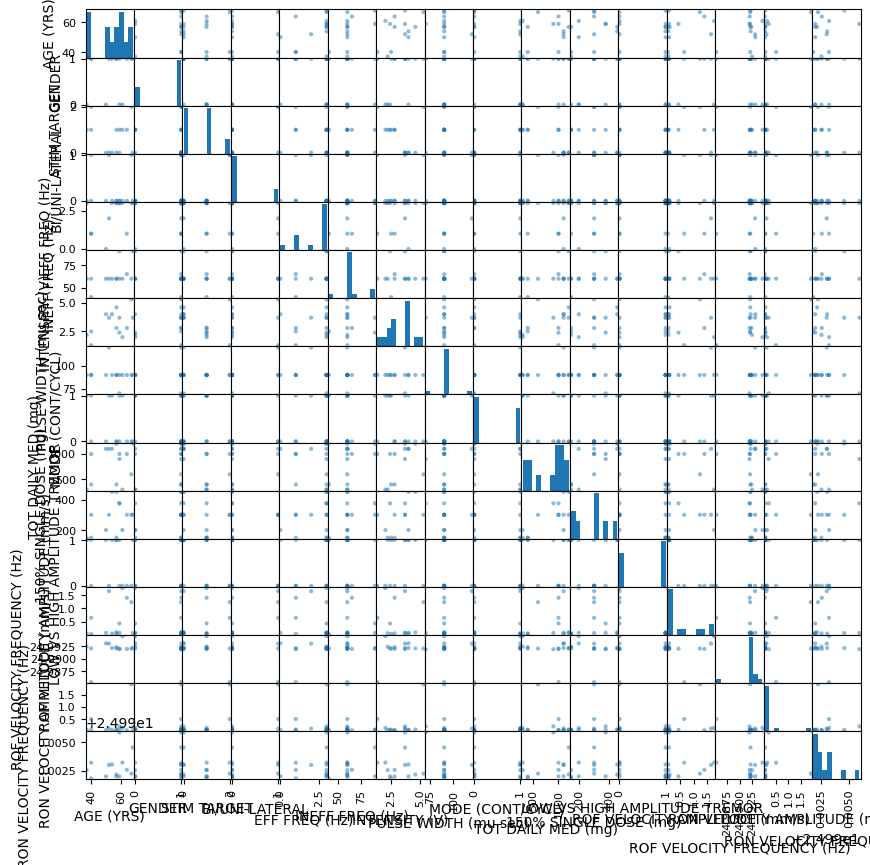

In [77]:
dataFrame = pd.DataFrame(X)
#X.columns = ['AGE (YRS)','GENDER','STIM TARGET','BI/UNI-LATERAL','MODE (CONT/CYCL)','TOT DAILY MED (mg)','150% SINGLE DOSE (mg)','LOW VS HIGH AMPLITUDE TREMOR']
X.columns = ['STIM TARGET','BI/UNI-LATERAL','EFF FREQ (Hz)','INEFF FREQ (Hz)','INTENSITY (V)','PULSE WIDTH (mu sec)','ROF VELOCITY AMPLITUDE (mm/s)','RON VELOCITY AMPLITUDE (mm/s)']
df.describe()
plt.figure(figsize=(30,20))
df.hist()
plt.figure(figsize=(30,20))
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
scatter_matrix(frame = df, alpha=0.5, figsize=(10,10), diagonal="hist")

In [78]:
'''#log transformation on skewed columns
columns_skewed = ["GENDER","STIM TARGET","BI/UNI-LATERAL","EFF FREQ (Hz)","TOT DAILY MED (mg)","ROF VELOCITY AMPLITUDE (mm/s)","ROF VELOCITY FREQUENCY (Hz)","RON VELOCITY FREQUENCY (Hz)"]
transformer = FunctionTransformer(np.log1p)
df[columns_skewed] = transformer.transform(df[columns_skewed])
df.describe()
dataFrame.hist()'''

'#log transformation on skewed columns\ncolumns_skewed = ["GENDER","STIM TARGET","BI/UNI-LATERAL","EFF FREQ (Hz)","TOT DAILY MED (mg)","ROF VELOCITY AMPLITUDE (mm/s)","ROF VELOCITY FREQUENCY (Hz)","RON VELOCITY FREQUENCY (Hz)"]\ntransformer = FunctionTransformer(np.log1p)\ndf[columns_skewed] = transformer.transform(df[columns_skewed])\ndf.describe()\ndataFrame.hist()'

AttributeError: 'DataFrame' object has no attribute 'update_layout'

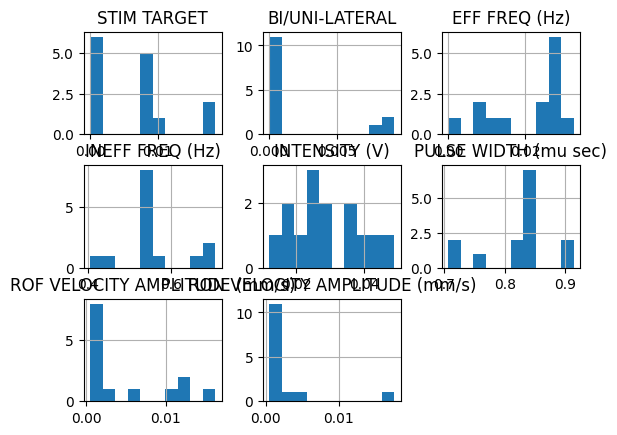

<Figure size 1000x800 with 0 Axes>

In [79]:
#normalization
normscaler = Normalizer().fit(X)
normalizedX = normscaler.transform(X)
dataNormDf = pd.DataFrame(normalizedX)
#dataNormDf.columns = ['AGE (YRS)','GENDER','STIM TARGET','BI/UNI-LATERAL','MODE (CONT/CYCL)','TOT DAILY MED (mg)','150% SINGLE DOSE (mg)','LOW VS HIGH AMPLITUDE TREMOR']
dataNormDf.columns = ['STIM TARGET','BI/UNI-LATERAL','EFF FREQ (Hz)','INEFF FREQ (Hz)','INTENSITY (V)','PULSE WIDTH (mu sec)','ROF VELOCITY AMPLITUDE (mm/s)','RON VELOCITY AMPLITUDE (mm/s)']
dataNormDf.describe()
dataNormDf.hist()
correlation_matrix = dataNormDf.corr(method='pearson')
plt.figure(figsize=(10,8))
correlation_matrix.update_layout(width=2000, height=2500)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

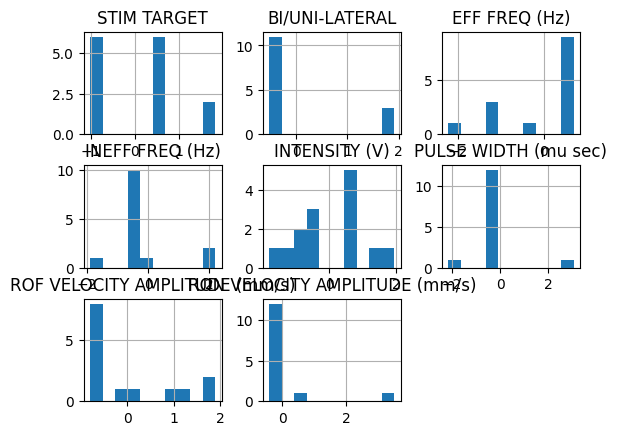

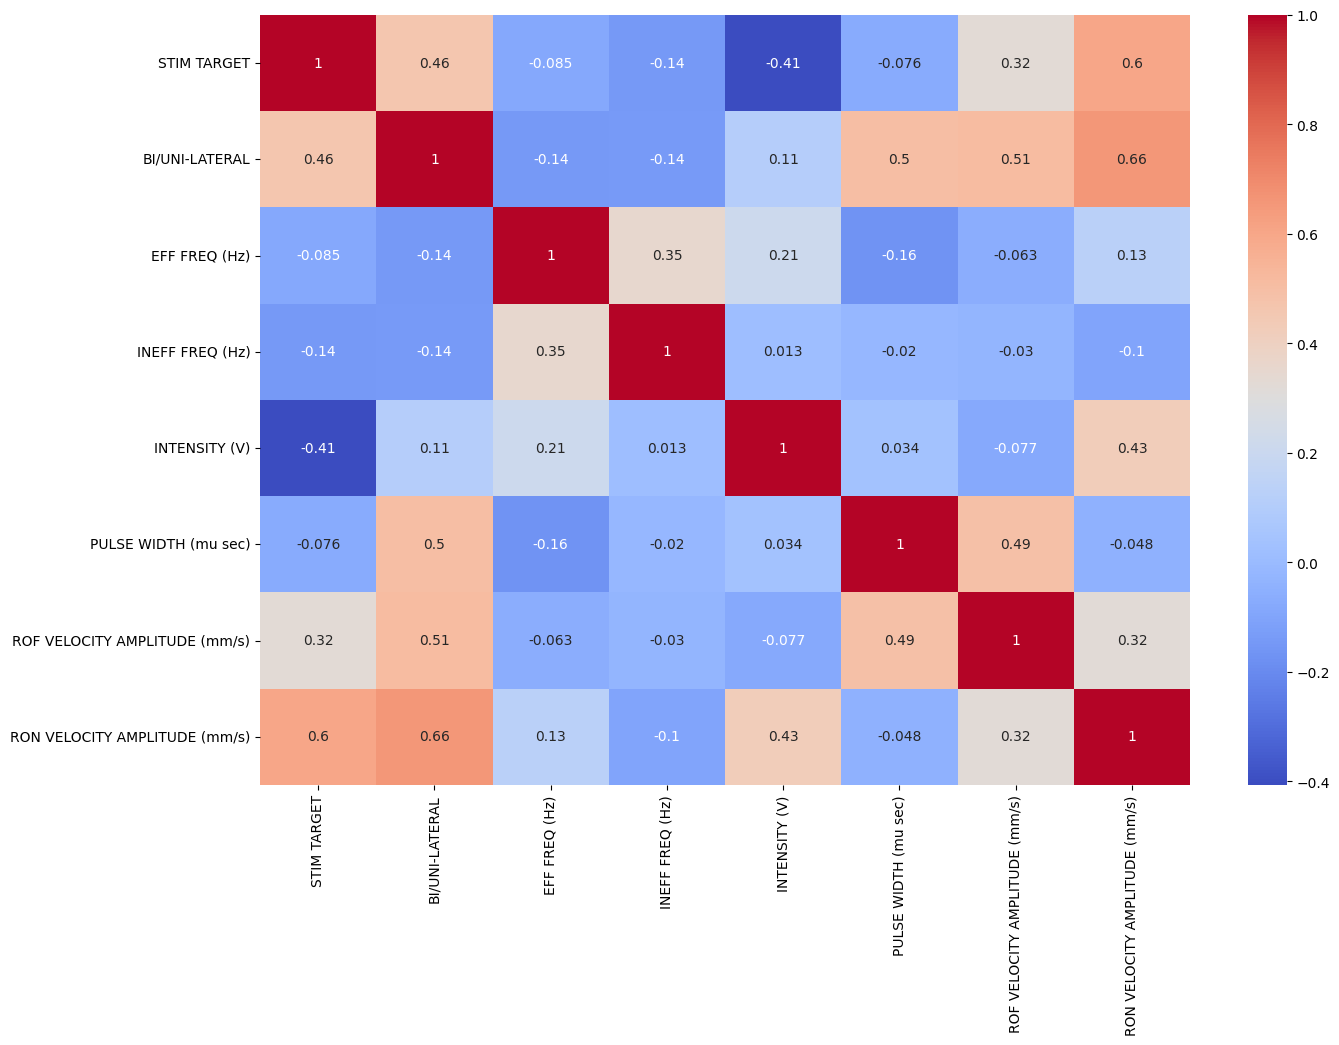

In [ ]:
#standardization
standscaler =  StandardScaler().fit(X)
standardizedX = standscaler.transform(X)
dataStandDf = pd.DataFrame(standardizedX)
#dataStandDf.columns = ['AGE (YRS)','GENDER','STIM TARGET','BI/UNI-LATERAL','MODE (CONT/CYCL)','TOT DAILY MED (mg)','150% SINGLE DOSE (mg)','LOW VS HIGH AMPLITUDE TREMOR']
dataStandDf.columns = ['STIM TARGET','BI/UNI-LATERAL','EFF FREQ (Hz)','INEFF FREQ (Hz)','INTENSITY (V)','PULSE WIDTH (mu sec)','ROF VELOCITY AMPLITUDE (mm/s)','RON VELOCITY AMPLITUDE (mm/s)']
dataStandDf.describe()
dataStandDf.hist()
correlation_matrix = dataStandDf.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalizedX, Y, test_size=0.30)

In [ ]:
linear_svc = LinearSVC(C=100, loss = 'hinge', random_state=42, max_iter=1000000)
linear_svc.fit(X_train, y_train)

y_linear_pred = linear_svc.predict(X_test)

#y_linear_train = accuracy_score(y_train, y_linear_pred)
#print(str(y_linear_train))

#accuracy score for the linear svc method
print("\nLinear SVC Method Test-Train-Split: " + str(accuracy_score(y_test, y_linear_pred)))





kernel_svc = SVC(kernel = 'rbf', degree = 2, C=1.0, random_state=42, max_iter = 1000000)
kernel_svc.fit(X_train, y_train)
y_kernel_pred = kernel_svc.predict(X_test)

# accuracy score for the linear svc method
print("\nKernel SVC Method Test-Train-Split: " + str(accuracy_score(y_test, y_kernel_pred)))




random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train)
# y_prob_rf = random_forest_clf.predict_proba(X_test)
# y_pred_rf = random_forest_clf.predict(X_test)
# y_score_rf = y_prob_rf[:, 1]
# fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)
y_rfclf_pred = random_forest_clf.predict(X_test)

# daccuracy score for the linear svc method
print("\nRandom Forest Classifier Test-Train-Split: " + str(accuracy_score(y_test, y_rfclf_pred)))



ada_clf = AdaBoostClassifier(n_estimators=200, algorithm= "SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_ada_pred = ada_clf.predict(X_test)

# accuracy score for the linear svc method
print("\nAdaBoosting Method Test-Train-Split: " + str(accuracy_score(y_test, y_ada_pred)))



bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#accuracy score for the bagging method
print("\nBagging Method Test-Train-Split: " + str(accuracy_score(y_test, y_pred)))




# accuracy for standard decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print("\nStandard Decision Tree Classifier Test-Train-Split: " + str(accuracy_score(y_test, y_pred_tree)))




# accuracy for mlp classifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

print("\nMLP Classifier Test-Train-Split: " + str(clf.score(X_test, y_test)))



Linear SVC Method Test-Train-Split: 0.6

Kernel SVC Method Test-Train-Split: 0.6

Random Forest Classifier Test-Train-Split: 0.6

AdaBoosting Method Test-Train-Split: 0.8

Bagging Method Test-Train-Split: 0.8

Standard Decision Tree Classifier Test-Train-Split: 0.8

MLP Classifier Test-Train-Split: 0.6


In [ ]:
# cross-validation
models = []
models.append(('Linear SVC Cross-Validation', linear_svc))
models.append(('Kernel SVC Cross-Validation', kernel_svc))
models.append(('Random Forest Cross-Validation', random_forest_clf))
models.append(('AdaBoost Cross-Validation', ada_clf))
models.append(('Bagging Cross-Validation', bag_clf))
models.append(('Standard Decision Tree Cross-Validation', tree_clf))
models.append(('MLP Classifier Cross-Validation', clf))


Linear SVC Cross-Validation: 0.400000 (0.489898)

Kernel SVC Cross-Validation: 0.400000 (0.489898)

Random Forest Cross-Validation: 0.650000 (0.450000)

AdaBoost Cross-Validation: 0.900000 (0.300000)

Bagging Cross-Validation: 0.900000 (0.300000)

Standard Decision Tree Cross-Validation: 0.900000 (0.300000)

MLP Classifier Cross-Validation: 0.600000 (0.489898)


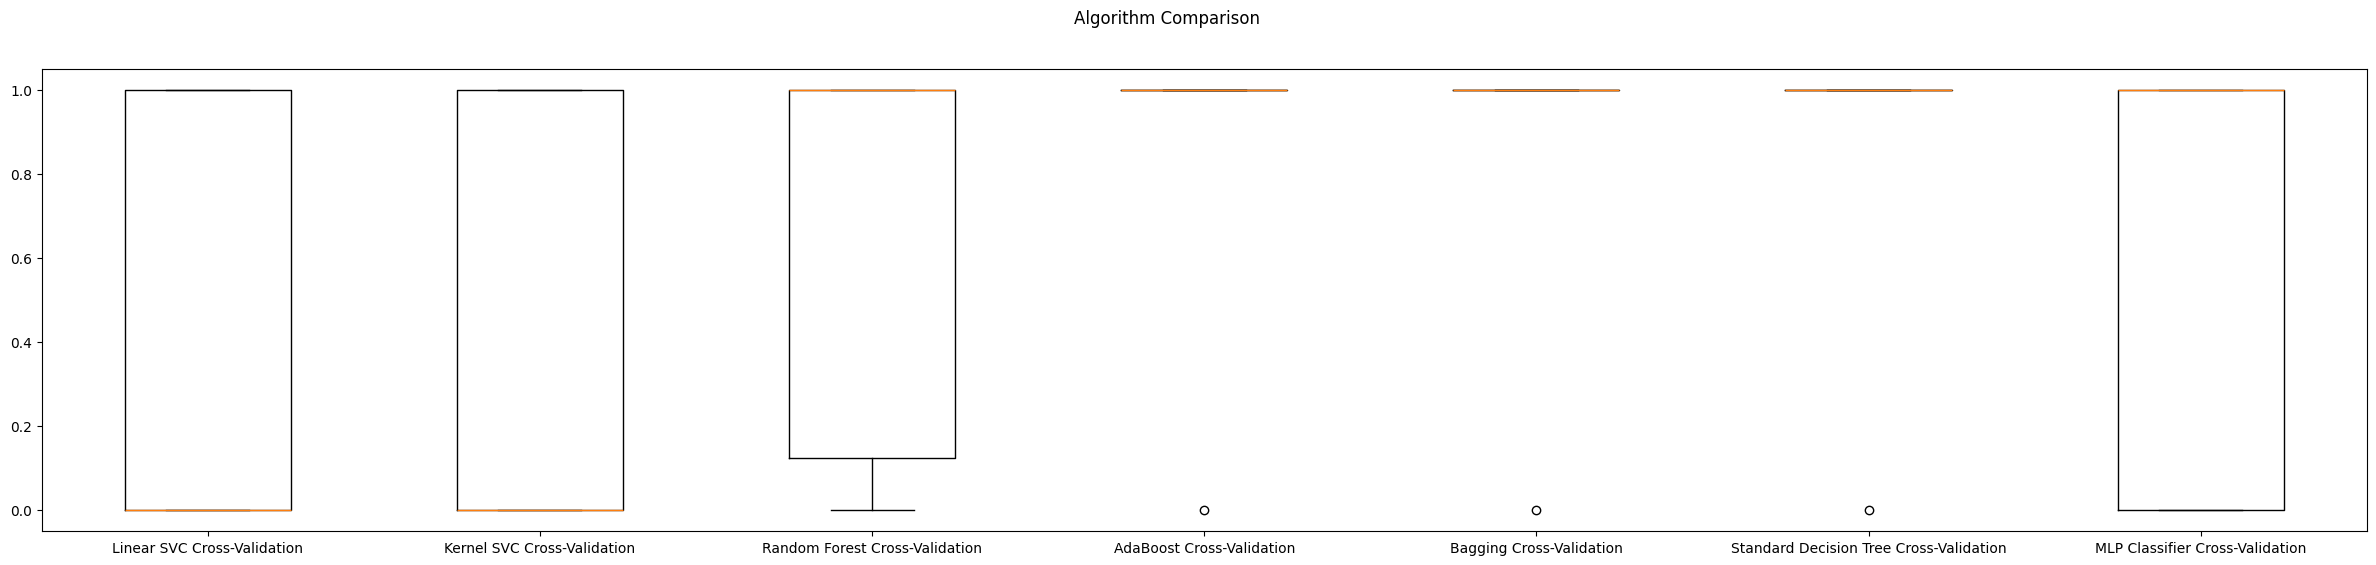

In [ ]:

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, normalizedX, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\n%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot
fig = plt.figure(figsize=(30,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(classifier, X_test, y_test, title):
    y_probs = classifier.predict_proba(X_test)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

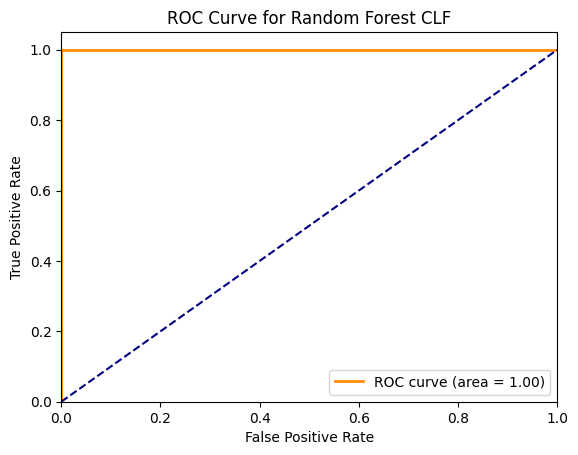

In [ ]:
# Random Forest Classifier
plot_roc_curve(random_forest_clf, X_test, y_test, 'ROC Curve for Random Forest CLF')

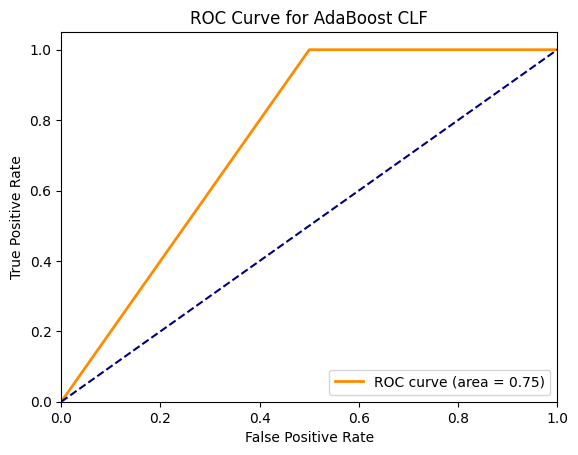

In [ ]:
# AdaBoost ClF
plot_roc_curve(ada_clf, X_test, y_test, 'ROC Curve for AdaBoost CLF')

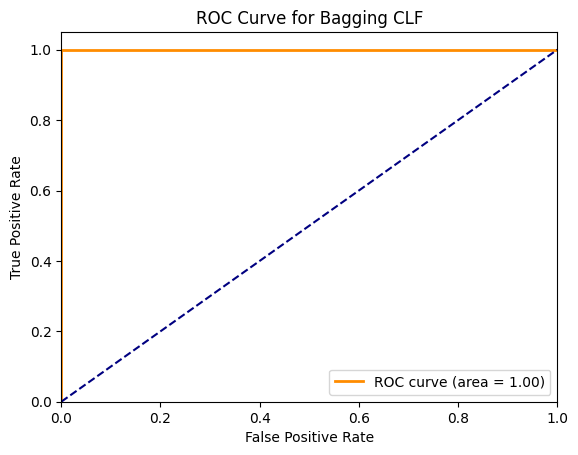

In [ ]:
# Bagging CLF
plot_roc_curve(bag_clf, X_test, y_test, 'ROC Curve for Bagging CLF')

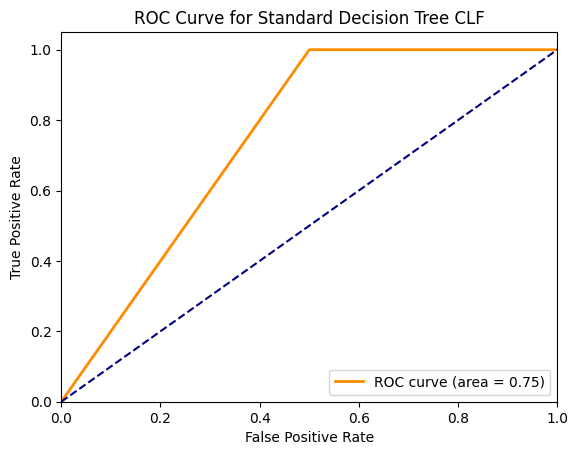

In [ ]:
# Standard Decision Tree CLF
plot_roc_curve(tree_clf, X_test, y_test, 'ROC Curve for Standard Decision Tree CLF')

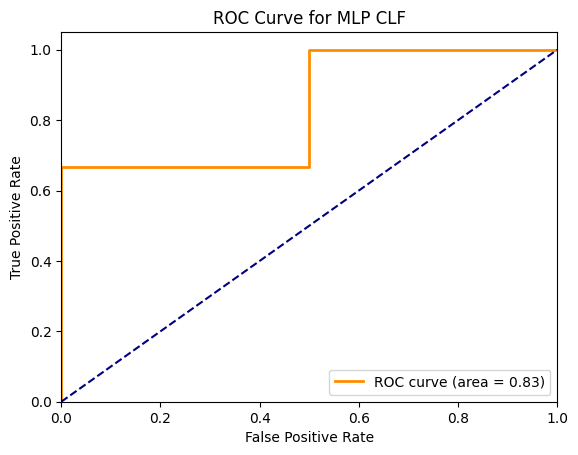

In [ ]:
# MLP Classifier
plot_roc_curve(clf, X_test, y_test, 'ROC Curve for MLP CLF')

In [ ]:
random_forest_clf.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
#basic Adaboost
ada_clf = AdaBoostClassifier(n_estimators=200, algorithm= "SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_ada_pred = ada_clf.predict(X_test)

# accuracy score for the linear svc method
print("\nAdaBoosting Method Test-Train-Split: " + str(accuracy_score(y_test, y_ada_pred)))


AdaBoosting Method Test-Train-Split: 0.8


In [ ]:
#altered Adaboost
# Splitting
X_train, X_test, y_train, y_test = train_test_split(normalizedX, Y, test_size=0.2, random_state=42)

# Hyperparameter tuning for AdaBoost
param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

ada = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_ada = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 10}


In [ ]:
best_ada.fit(X_train, y_train)

# predictions
y_pred = best_ada.predict(X_test)
y_proba = best_ada.predict_proba(X_test)[:, 1]

print(str(y_pred))

[1 1 0]


Accuracy: 1.0
True Positive Rate (Recall): 1.0
False Positive Rate: 0.0
Precision: 1.0
AUC-ROC: 1.0


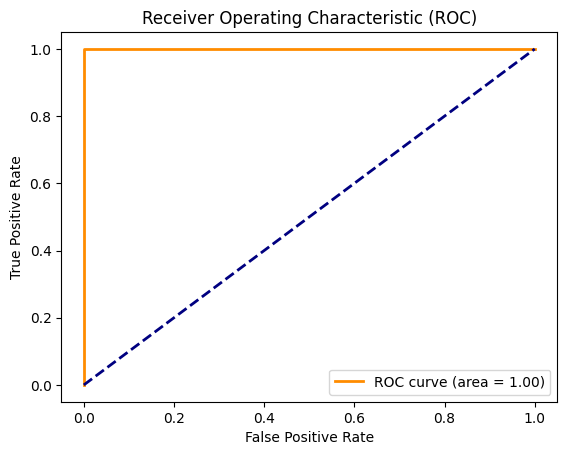

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# True Positive Rate (Recall)
tpr = tp/(tp+fn)

# False Positive Rate
fpr = fp/(fp+tn)

# Precision
precision = tp/(tp+fp)

# Recall (same as True Positive Rate)
recall = tpr

# AUC-ROC
fpr_curve, tpr_curve, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_curve, tpr_curve)

print(f'Accuracy: {accuracy}')
print(f'True Positive Rate (Recall): {tpr}')
print(f'False Positive Rate: {fpr}')
print(f'Precision: {precision}')
print(f'AUC-ROC: {roc_auc}')

# Plotting ROC curve
plt.figure()
plt.plot(fpr_curve, tpr_curve, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
loo = LeaveOneOut()

# crossval with predictions
predicted = cross_val_score(best_ada, normalizedX, Y, cv=loo)
checkoutput = Y

# accuracy
loo_accuracy = accuracy_score(checkoutput, (predicted > 0.5).astype(int))

# confusion matrix
loo_cm = confusion_matrix(checkoutput, (predicted > 0.5).astype(int))
loo_tn, loo_fp, loo_fn, loo_tp = loo_cm.ravel()

# calculate all
loo_tpr = loo_tp / (loo_tp + loo_fn)  # Recall
loo_fpr = loo_fp / (loo_fp + loo_tn)
loo_precision = loo_tp / (loo_tp + loo_fp)
loo_recall = loo_tpr

# Calculate ROC AUC
loo_fpr_curve, loo_tpr_curve, _ = roc_curve(checkoutput, predicted)
loo_roc_auc = auc(loo_fpr_curve, loo_tpr_curve)

print(f'LOOCV Accuracy: {loo_accuracy}')
print(f'LOOCV True Positive Rate (Recall): {loo_tpr}')
print(f'LOOCV False Positive Rate: {loo_fpr}')
print(f'LOOCV Precision: {loo_precision}')
print(f'LOOCV AUC-ROC: {loo_roc_auc}')

LOOCV Accuracy: 0.6428571428571429
LOOCV True Positive Rate (Recall): 1.0
LOOCV False Positive Rate: 0.8333333333333334
LOOCV Precision: 0.6153846153846154
LOOCV AUC-ROC: 0.5833333333333333


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_tn, knn_fp, knn_fn, knn_tp = knn_cm.ravel()

knn_tpr = knn_tp/(knn_tp+knn_fn)
knn_fpr = knn_fp/(knn_fp+knn_tn)
knn_precision = knn_tp/(knn_tp+knn_fp)
knn_recall = knn_tpr

knn_proba = knn.predict_proba(X_test)[:, 1]
knn_fpr_curve, knn_tpr_curve = roc_curve(y_test, knn_proba)
knn_roc_auc = auc(knn_fpr_curve, knn_tpr_curve)

print(f'KNN Accuracy: {knn_accuracy}')
print(f'KNN True Positive Rate (Recall): {knn_tpr}')
print(f'KNN False Positive Rate: {knn_fpr}')
print(f'KNN Precision: {knn_precision}')
print(f'KNN AUC-ROC: {knn_roc_auc}')

ValueError: too many values to unpack (expected 2)